# Show data collected

## - Class plot

In [ ]:
import pandas as pd
data = pd.read_csv('./labeled/12-01-rebalanced-only-labeled.csv', index_col=False, delimiter=",")

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data['target'].value_counts().plot(kind='bar')
plt.xlabel("Label", labelpad=14)
plt.xticks(rotation=0)
plt.ylabel("Tweets", labelpad=14);
# plt.title("Training set", y=1.02);

plt.savefig('training set.png')

## - Histogram of a single file

In [ ]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv(file_name, index_col=False, delimiter=",")

# get only month and year from datetime column (date of exam)
df['date_col'] = df['Datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
print(df.shape)

# group by based on month and year after filtering poor graded students
data = df.groupby(['date_col']).size().reset_index(name = 'count')  

ax = sns.barplot(x="date_col", y="count", data=data, zorder=2).set(title='Distribution of tweets') #plot using seaborn
plt.xticks(rotation=70)
plt.tight_layout()
plt.rcParams["figure.figsize"] = [11,9]
plt.grid()

## - Bar charts

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('./merged/monitoring.csv', index_col=False, delimiter=",")

# get only month and year from datetime column (date of exam)
df['date_col'] = df['datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
print(df.shape)

# group by based on month and year after filtering poor graded students
data = df.groupby(['date_col']).size().reset_index(name = 'count')  

ax = sns.barplot(x="date_col", y=data["count"], data=data, zorder=2, color="cornflowerblue")
# plt.title('Distribution of tweets',fontsize=36,pad=30)
plt.xlabel('Time',fontsize=30,labelpad=24)
plt.ylabel('#Tweets',fontsize=30)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=26)
plt.tight_layout()
plt.rcParams["figure.figsize"] = [28,9]
plt.grid()
plt.savefig('./monitoring/monitoring_barplot_days.png')

In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df = pd.read_csv('./merged/monitoring.csv', index_col=False, delimiter=",")
# get only month and year from datetime column (date of exam)
df['date_col'] = df['datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
print(df.shape)

# group by based on month and year after filtering poor graded students
data = df.groupby(['date_col']).size().reset_index(name = 'count')  
data['date_col'] = data['date_col'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')
data['date_col'] = pd.to_datetime(data['date_col'], format='%Y-%m-%d')


# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')
# Plot
plt.bar(data['date_col'], data['count'], color="cornflowerblue")
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

# Labels
# plt.title('Distribution of tweets',fontsize=36,pad=30)
# plt.xlabel('Time',fontsize=30,labelpad=50)
plt.ylabel('#Tweets',fontsize=36,labelpad=26)
#Ticks
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.tick_params(axis='y', pad=10)
plt.tick_params(axis='x', pad=10)

plt.margins(x=0)    # delete graph lateral margin
plt.ylim(ymin=0)    # y values start from 0
plt.tight_layout()
plt.rcParams["figure.figsize"] = [28,9]
plt.grid(zorder=2)
plt.savefig('./monitoring/monitoring_barplot.png')
plt.show()

## - Find peaks

     counts    datetime
99     1028  2022-03-10
103     919  2022-03-14
108     822  2022-03-19
113     863  2022-03-24
129     928  2022-04-09
199     824  2022-06-18
231     874  2022-07-20
{'2022-03-10': 1028, '2022-03-14': 919, '2022-03-19': 822, '2022-03-24': 863, '2022-04-09': 928, '2022-06-18': 824, '2022-07-20': 874}
{'2022-03-10': 1028, '2022-04-09': 928, '2022-06-18': 824, '2022-07-20': 874}


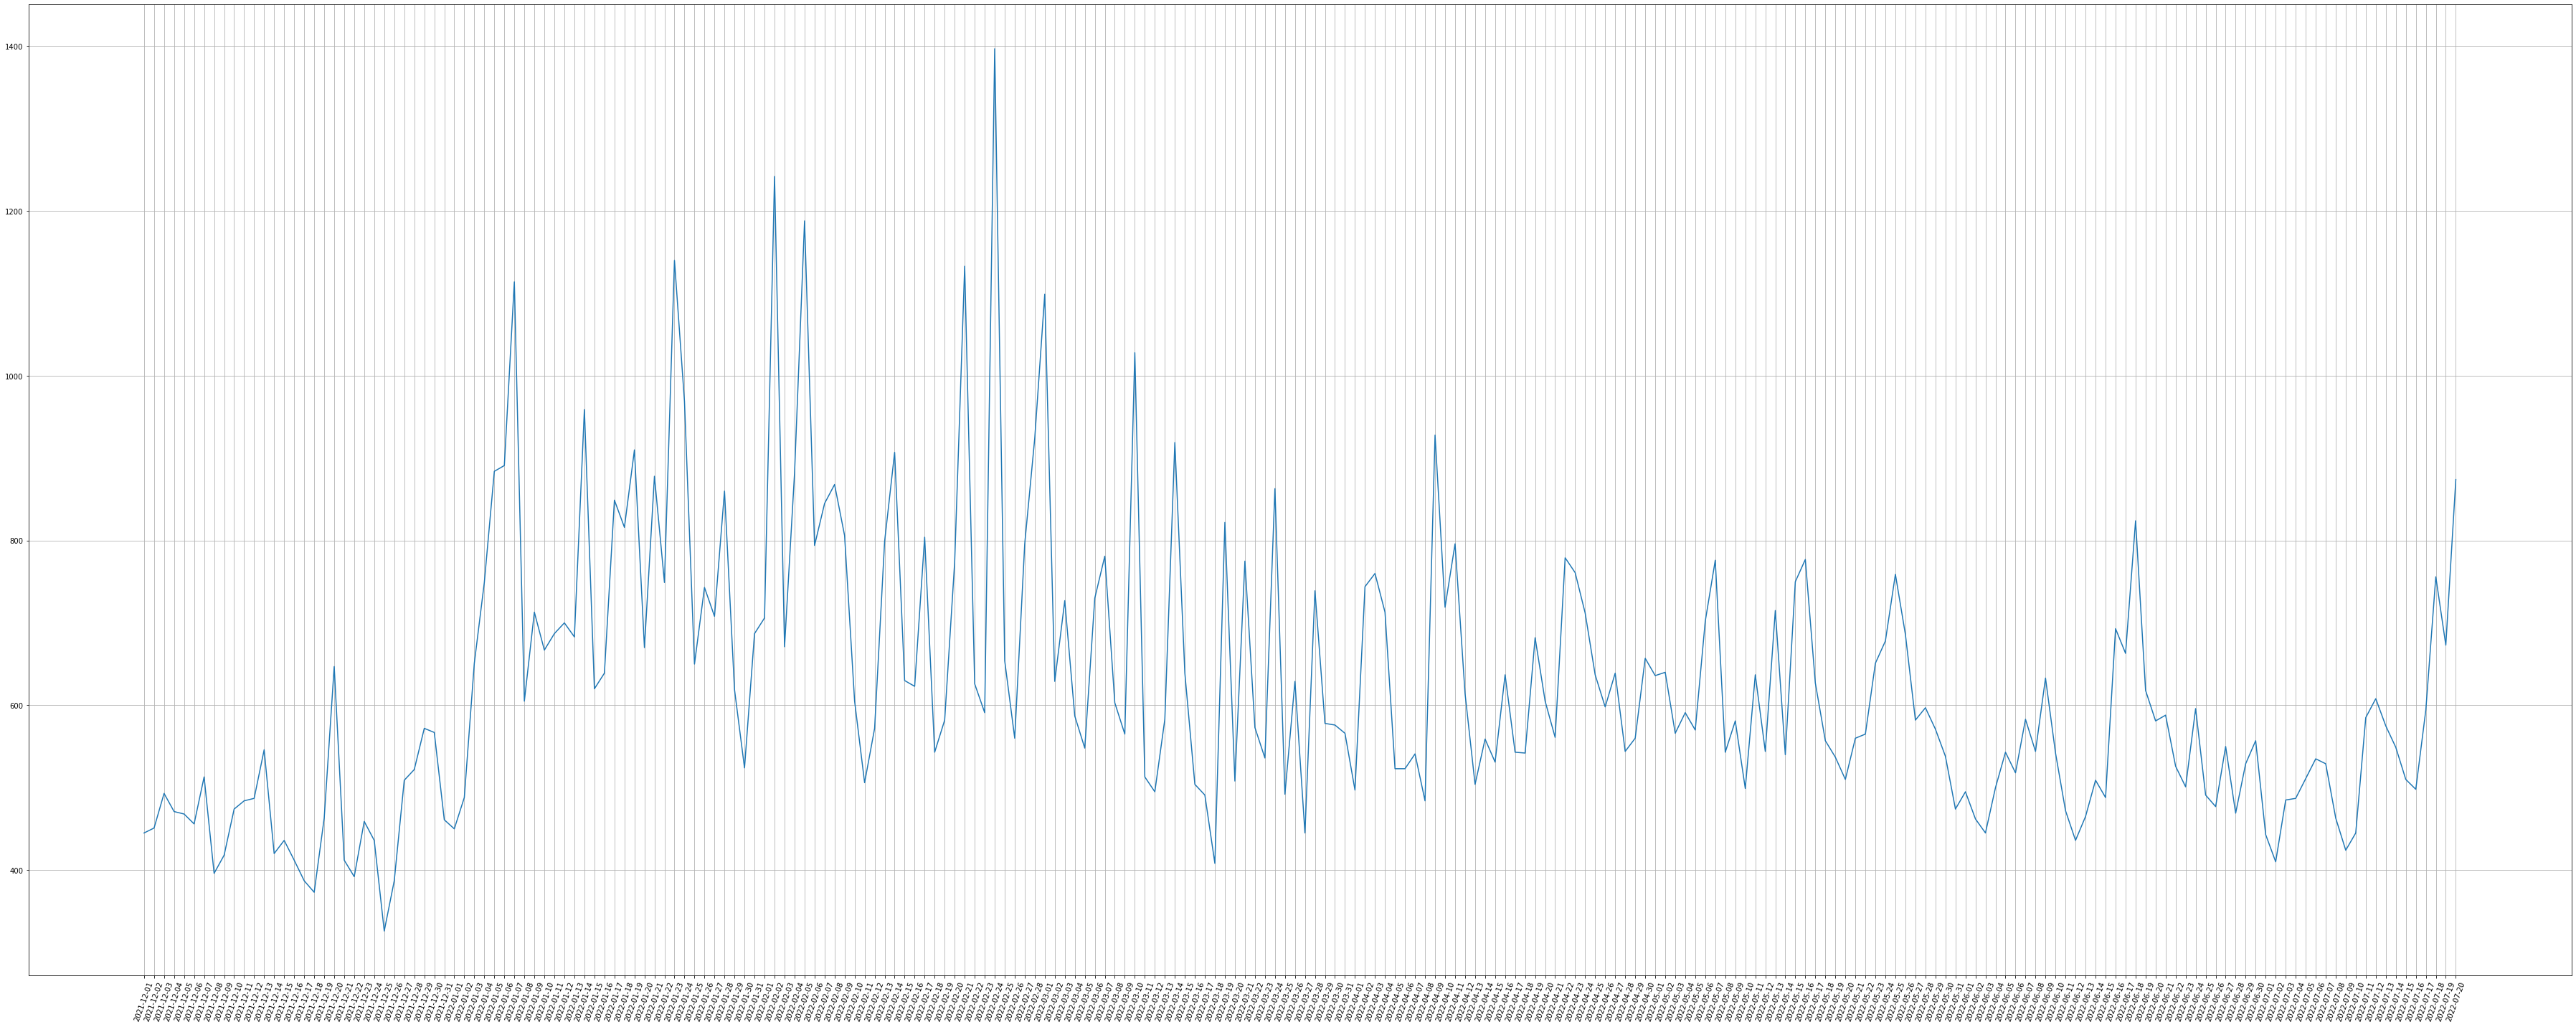

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


input_file = './merged/cleaned.csv'
dataset = pd.read_csv(input_file)
dataset = dataset.groupby(dataset['datetime'].astype('datetime64').dt.to_period('d')).size().reset_index(name='counts')
dataset["datetime"]= dataset["datetime"].dt.strftime('%Y-%m-%d')
dataset = dataset.iloc[:, ::-1]

res = dataset[(dataset['counts'] > 800) & (dataset['datetime'] > '2022-03-01')]
print(res)

peaks = {}
for index, row in res.iterrows():
    peaks[row['datetime']] = row['counts']
print(peaks)
Discarded = ['2022-03-14', '2022-03-19', '2022-03-24']
for peak in Discarded:
    peaks.pop(peak)
print(peaks)

ax = plt.plot(dataset['datetime'], dataset['counts'])
plt.xticks(rotation=70)
plt.tight_layout()
plt.rcParams["figure.figsize"] = [50,20]
plt.grid()

## - Peaks highlighted

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df = pd.read_csv('./merged/monitoring.csv', index_col=False, delimiter=",")
# get only month and year from datetime column (date of exam)
df['date_col'] = df['datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
print(df.shape)


# group by based on month and year after filtering poor graded students
data = df.groupby(['date_col']).size().reset_index(name = 'count')  
data['date_col'] = data['date_col'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')
data['date_col'] = pd.to_datetime(data['date_col'], format='%Y-%m-%d')
data.set_index("date_col")

# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

fig, ax = plt.subplots()
# bars = ax.bar(x="date_col", y=data["count"], data=data, zorder=2, color="cornflowerblue")

barlist = plt.bar(data['date_col'], data['count'], color="cornflowerblue")

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
# Labels
# plt.title('Distribution of tweets',fontsize=36,pad=30)
# plt.xlabel('Time',fontsize=30,labelpad=50)
plt.ylabel('#Tweets',fontsize=36,labelpad=26)
#Ticks
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.tick_params(axis='y', pad=10)
plt.tick_params(axis='x', pad=10)

plt.margins(x=0)    # delete graph lateral margin
plt.ylim(ymin=0)    # y values start from 0
plt.tight_layout()
plt.rcParams["figure.figsize"] = [28,9]
plt.grid(zorder=2)
# plt.subplots_adjust(bottom=0.55)

print(peaks)

for peak in peaks.keys():
    print(peak)
    p = datetime.strptime(peak, '%Y-%m-%d')
    i = data[data['date_col'] == peak].index[0]
    row = data[data['date_col'] == peak]
    ts = row.iloc[0]['date_col']
    s = ts.strftime('%Y-%m-%d')
    plt.text(ts,-300, s, fontsize=24, rotation=90)
    barlist[i].set_color('salmon')
    

plt.savefig('./monitoring/img/monitoring_barplot_peaks.png', bbox_inches='tight')
plt.show()


## - Line chart

In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df = pd.read_csv('./merged/monitoring.csv', index_col=False, delimiter=",")
# get only month and year from datetime column (date of exam)
df['date_col'] = df['datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
print(df.shape)

# group by based on month and year after filtering poor graded students
data = df.groupby(['date_col']).size().reset_index(name = 'count')  
data['date_col'] = data['date_col'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')
data['date_col'] = pd.to_datetime(data['date_col'], format='%Y-%m-%d')


# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

plt.plot(data['date_col'], data['count'], color="cornflowerblue")
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
# Labels
# plt.title('Distribution of tweets',fontsize=36,pad=30)
# plt.xlabel('Time',fontsize=30,labelpad=50)
plt.ylabel('#Tweets',fontsize=36,labelpad=26)
#Ticks
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.tick_params(axis='y', pad=10)
plt.tick_params(axis='x', pad=10)

plt.margins(x=0)    # delete graph lateral margin
plt.ylim(ymin=0)    # y values start from 0
plt.tight_layout()
plt.rcParams["figure.figsize"] = [28,9]
plt.grid()
plt.savefig('./monitoring/monitoring_lineplot.png')
plt.show()

## - Frequency of words

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

df = pd.read_csv('./labeled/12-01-rebalanced.csv')

dfa = df['text']
dfb = pd.read_csv("keys.txt", sep=';')

Words = dfb['Words'].values
dico = {}
for word in Words:
    dico[word] = dfa.str.count(word).sum()

print(dico)

#plt.bar(dico.keys(), dico.values(), width, color='g')

words = list(dico.keys())
count = list(dico.values())
    
plt.barh(words,count)
plt.title('Word occurences')
plt.ylabel('Keywords')
plt.xlabel('Count')
plt.show()

# - Comparing learning models

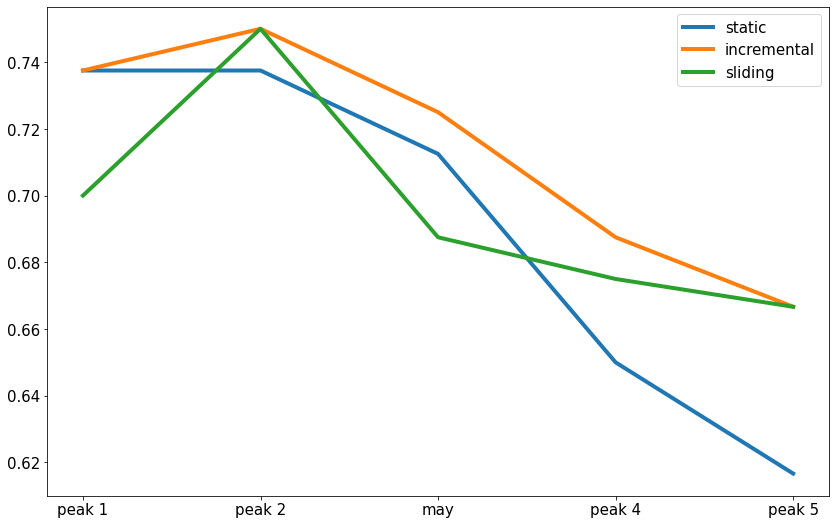

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path_file = './monitoring/concept_drift/'
peaks = []
i = 0
static_values = []
incremental_values = []
sliding_values = []
for i in range (0,5):
    static = pd.read_csv(path_file+"static/period"+str(i+1)+"-report.csv")
    incremental = pd.read_csv(path_file+"incremental/interval"+str(i+1)+"-report.csv")
    sliding = pd.read_csv(path_file+"sliding/slide"+str(i+1)+"-report.csv")
    static_values.append(static['precision'][2])
    incremental_values.append(incremental['precision'][2])
    sliding_values.append(sliding['precision'][2])
    if i == 2:
        peaks.append('may')
    else:
        peaks.append("peak "+str(i+1))
    i+=1
plt.plot(peaks, static_values, label="static", linewidth=4)
plt.plot(peaks, incremental_values, label="incremental", linewidth=4)
plt.plot(peaks, sliding_values, label="sliding", linewidth=4)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15)
plt.rcParams["figure.figsize"] = [14,9]
plt.savefig('./monitoring/img/accuracy_for_model.png')

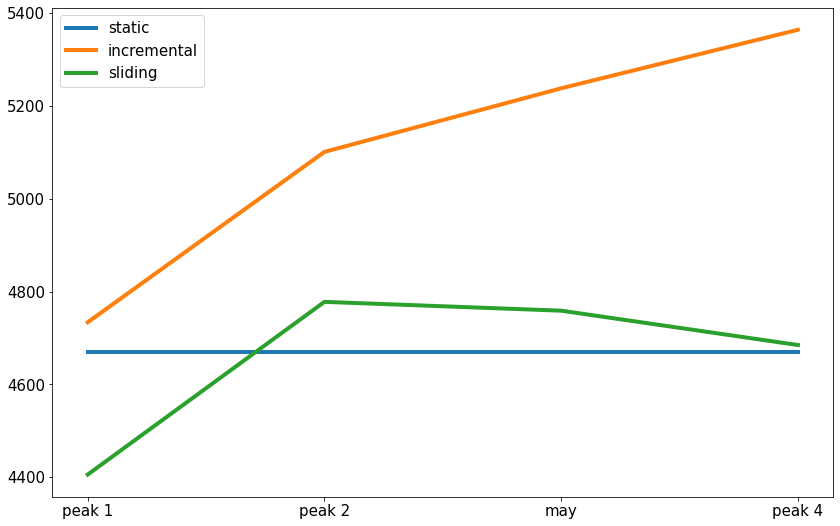

In [44]:
import pickle
static_path = './models_result/85/models_85/'
incremental_path = './monitoring/concept_drift/incremental/'
sliding_path='./monitoring/concept_drift/sliding/'
i=0
incremental = []
sliding = []
static = []
peaks = []

while i in range(0,4):
    incremental_model = pickle.load(open(incremental_path+"ComplementNB_interval" + str(i+1) + ".sav", 'rb'))
    incremental.append(len(incremental_model['vect'].vocabulary_))
    sliding_model = pickle.load(open(sliding_path+"ComplementNB_slide" + str(i+1) + ".sav", 'rb'))
    sliding.append(len(sliding_model['vect'].vocabulary_))
    if i == 2:
        peaks.append('may')
    else:
        peaks.append("peak "+str(i+1))
    static_model = pickle.load(open(static_path+"ComplementNB.sav", 'rb'))
    static.append(len(static_model['vect'].vocabulary_))
    i+=1
    
plt.plot(peaks, static, label="static", linewidth=4)
plt.plot(peaks, incremental, label="incremental", linewidth=4)
plt.plot(peaks, sliding, label="sliding", linewidth=4)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15)
plt.rcParams["figure.figsize"] = [14,9]
plt.savefig('./monitoring/img/features_for_model.png')